<h2 align="center">Effect of COVID-19 on 20 tech stocks</h2>
<p> COVID-19 has changed our lives. We are in lockdown, and have had to make major changes to our lifestyles. The stock market has had to deal with some drastic changes of its own. In this project I will explore the fate of some of tech stocks to see how good (or bad) they have braved the COVID-19 storm.

Disclaimer: this project is meant for some basic pandas and viz skills practice and **should not** be used to derive any financial advice. </p>

In [1]:
%%html
<style type="text/css">

 body {
     background-color: #4CB1F7;
     margin: 0;
     padding: 6em;
     font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;
     font-size: 1em;
}



 h2 {
     color: #0339A6;
     height: 3em;
     width: 100%;
     margin-bottom: 1em;
     font-size: 2em;  
 }

div.output_area {
    width: 100%;
    font-size: 1.1em;
    color: #565656;
}

div.output_area pre {
    font-size: 1.1em;
    padding: 1.5em;
}

div.output_png.output_subarea {
    max-width: 100%;
}

</style>

In [2]:
import datetime

now = datetime.datetime.now()
print("Last updated:", now.strftime("%Y-%m-%d" + " at "+ "%H:%M:%S"))

Last updated: 2022-03-31 at 17:48:28


### Get the Data

In this section I use pandas to scrape data from Yahoo! finance using pandas.

In [12]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline
import os
import yfinance as yf


#Plotly Method Imports
import plotly # You can use matplotlib as well for these plots as well
import cufflinks as cf 
cf.go_offline()

/Users/atreyid/miniconda3/lib/python3.9/site-packages/google/colab/data_table.py:30: UserWarning:

IPython.utils.traitlets has moved to a top-level traitlets package.



The stock data for these tickers are queried from Jan 1st 2017 to current date and saved in their own dataframes.

stock tickers are as follows:
MSFT, AAPL, AMZN, GOOG, BABA, FB, INTC, NVDA, CRM, PYPL, TSLA, AMD, EA, MTCH, TTD, ZG, ATVI, YELP, TIVO, ZM and VMW

In [15]:
start = datetime.datetime(2012, 1, 1) # START ON January 1 2017
end = datetime.date.today() # LOOK AT STOCKS TILL current date

tickers = ['MSFT','AAPL','AMZN','GOOG','BABA','FB','INTC','NVDA','CRM','PYPL','TSLA','AMD','EA','MTCH','TTD','ZG',
           'ATVI','YELP','ZM','VMW', 'DBX', 'ADBE']
df_map = {}

for tick in tickers:
    data_source='google'
    stock =yf.download(tick,start, end)
    df_map[tick] = stock

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

#### Using pd.concat to concatenate the stock dataframes together to a single data frame called tech_stocks

In [16]:
tech_stocks = pd.concat(df_map,axis = 1,keys = tickers)
tech_stocks.columns.names = ['Stock Ticker','Stock Info']
tech_stocks.tail()

Stock Ticker        MSFT                                                  \
Stock Info          Open        High         Low       Close   Adj Close   
Date                                                                       
2022-03-24    299.140015  304.200012  298.320007  304.100006  304.100006   
2022-03-25    305.230011  305.500000  299.290009  303.679993  303.679993   
2022-03-28    304.329987  310.799988  304.329987  310.700012  310.700012   
2022-03-29    313.910004  315.820007  309.049988  315.410004  315.410004   
2022-03-30    313.760010  315.950012  311.579987  313.859985  313.859985   

Stock Ticker                  AAPL                                      ...  \
Stock Info      Volume        Open        High         Low       Close  ...   
Date                                                                    ...   
2022-03-24    24484500  171.059998  174.139999  170.210007  174.070007  ...   
2022-03-25    22550600  173.880005  175.279999  172.750000  174.720001  ...   
2022-03-28    29578200  172.169998  175.729996  172.000000  175.600006  ...   
2022-03-29    30393400  176.690002  179.009995  176.339996  178.960007  ...   
2022-03-30    28163600  178.550003  179.610001  176.699997  177.770004  ...   

Stock Ticker        DBX                                         ADBE  \
Stock Info          Low      Close  Adj Close     Volume        Open   
Date                                                                   
2022-03-24    22.850000  23.230000  23.230000  2468900.0  426.079987   
2022-03-25    22.990000  23.270000  23.270000  1905600.0  435.440002   
2022-03-28    23.170000  23.520000  23.520000  1920200.0  433.420013   
2022-03-29    23.549999  24.129999  24.129999  2440300.0  459.160004   
2022-03-30    23.555000  23.690001  23.690001  2323100.0  461.519989   

Stock Ticker                                                           
Stock Info          High         Low       Close   Adj Close   Volume  
Date                                                                   
2022-03-24    432.209991  421.489990  432.140015  432.140015  5544300  
2022-03-25    438.619995  426.000000  431.619995  431.619995  3283600  
2022-03-28    450.320007  433.149994  450.010010  450.010010  4472600  
2022-03-29    467.799988  452.440002  466.329987  466.329987  4323800  
2022-03-30    466.769989  456.839996  460.059998  460.059998  3889200  

[5 rows x 132 columns]

What is the maximum and minimum of the Close price for each tech company's stock throughout the time period? Let's also use a bar plot to visualize the data as well.

Note: We use a log scale for close price to normalize the values to a uniform scale.

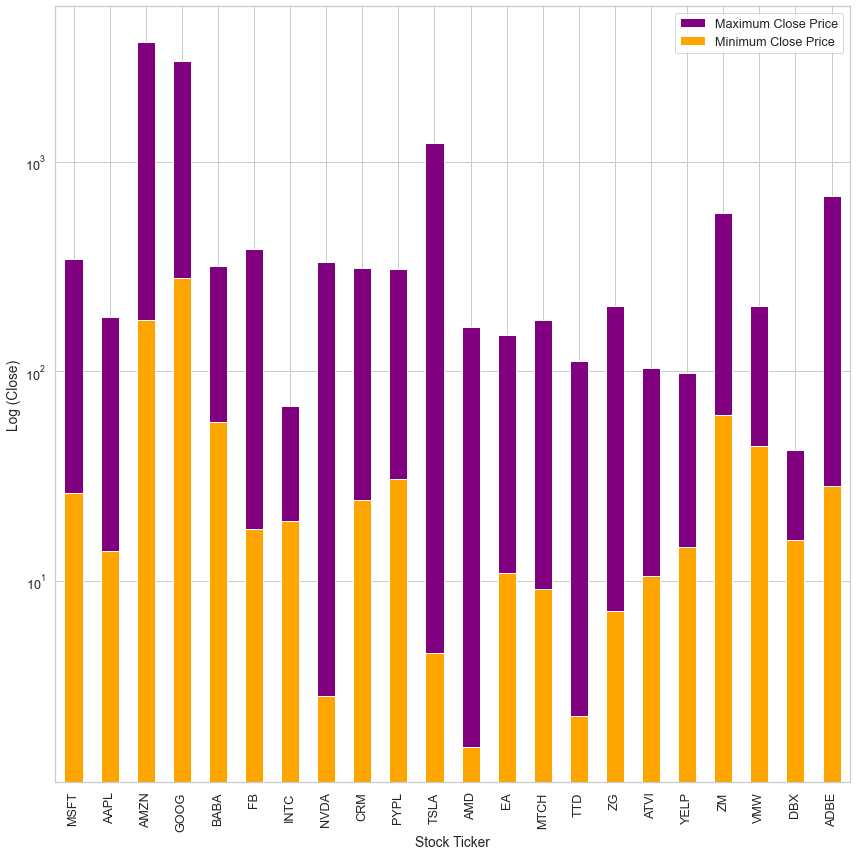

In [17]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'large',
         'axes.labelsize': 'large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
max_close = tech_stocks.xs(key='Close',axis=1,level='Stock Info').max()
min_close = tech_stocks.xs(key='Close',axis=1,level='Stock Info').min()
plt.figure(figsize=(12,12))
plt.yscale('log')
plt.tight_layout()
plt.ylabel('Log (Close)')
max_close.plot(kind='bar',color='purple',label='Maximum Close Price')
min_close.plot(kind='bar',color='orange',label='Minimum Close Price')
plt.legend()
plt.tight_layout()

Using the bar-plot above, stocks can be classified into two broad groups: Reliable stocks and Volatile stocks. 

**Reliable stocks** are the ones that didnot show much difference between the minimum Close price and maximum Close Price in the time period specified. e.g.: GOOG and AMZN. 
**Volatile stocks** are the ones that fluctate the most between the minimum and maximum closing price of stocks. e.g.: TTD and TIVO

However, a more interesting comparison is to compare the same data against two separate time-periods: Pre-COVID-19 and Post-COVID-19.

Text(0.5, 1.0, 'Post COVID-19: Jan 2020 - Today')

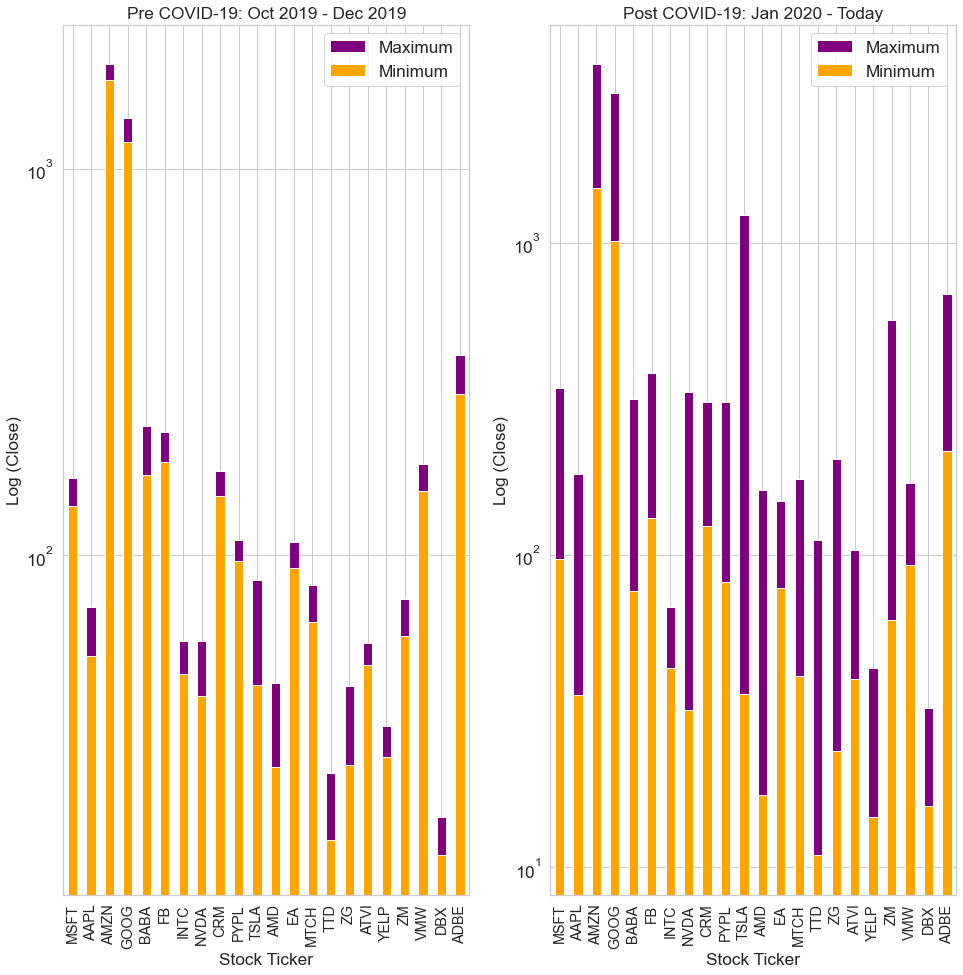

In [18]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'xx-large',
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'xx-large'}
pylab.rcParams.update(params)
current_date_str = datetime.date.today().strftime("%Y-%m-%d") #to store the current date as a string
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(16,16))


max_close_pre_corona = tech_stocks.xs(key='Close',axis=1,level='Stock Info').loc['2019-10-01':'2019-12-31'].max()
min_close_pre_corona = tech_stocks.xs(key='Close',axis=1,level='Stock Info').loc['2019-10-01':'2019-12-31'].min()
#plot
max_close_pre_corona.plot(kind='bar',ax = axes[0],subplots=True,color='purple')
min_close_pre_corona.plot(kind='bar',ax = axes[0],subplots=True,color='orange')
axes[0].set_yscale('log')
axes[0].set_ylabel('Log (Close)')
axes[0].legend(["Maximum", "Minimum"])
axes[0].set_title('Pre COVID-19: Oct 2019 - Dec 2019')

max_close_post_corona = tech_stocks.xs(key='Close',axis=1,level='Stock Info').loc['2020-01-01':current_date_str].max()
min_close_post_corona = tech_stocks.xs(key='Close',axis=1,level='Stock Info').loc['2019-01-01':current_date_str].min()
#plot
max_close_post_corona.plot(kind='bar',ax = axes[1],subplots=True,color='purple')
min_close_post_corona.plot(kind='bar',ax = axes[1],subplots=True,color='orange')
axes[1].set_yscale('log')
axes[1].set_ylabel('Log (Close)')
axes[1].legend(["Maximum", "Minimum"])
axes[1].set_title('Post COVID-19: Jan 2020 - Today')


It is clear that the more **Reliable** stocks like AAPL and AMZN in the pre COVID-19 period saw significant volatility in their closing prices once the COVID-19 storm hit.    

The next analysis is to use pandas pct_change() method on the Close column to create a **Returns** value. A return is defined as the change in price of stocks over time, which may be represented in terms of price change or percentage change. A positive return represents a profit while a negative return marks a loss.

In [19]:
returns = pd.DataFrame() #empty dataframe
for tick in tickers:
    returns[tick+' Return'] = tech_stocks[tick]['Close'].pct_change()
returns.tail()

,MSFT Return,AAPL Return,AMZN Return,GOOG Return,BABA Return,FB Return,INTC Return,NVDA Return,CRM Return,PYPL Return,...,EA Return,MTCH Return,TTD Return,ZG Return,ATVI Return,YELP Return,ZM Return,VMW Return,DBX Return,ADBE Return
Date,,,,,,,,,,,,,,,,,,,,,
2022-03-24,0.015393,0.022678,0.001478,0.020277,-0.017827,0.028624,0.069401,0.098151,0.013595,0.012211,...,0.007461,0.044590,0.026411,0.012551,0.006956,0.017981,0.008047,0.009027,0.008246,0.021849
2022-03-25,-0.001381,0.003734,0.006868,0.001483,-0.018758,0.010247,0.004068,-0.016270,-0.013786,-0.019733,...,0.013936,-0.003082,-0.043129,-0.059204,-0.000251,-0.009402,-0.032442,0.008520,0.001722,-0.001203
2022-03-28,0.023117,0.005037,0.025593,0.003028,0.018586,0.007979,-0.006174,0.019031,0.020139,0.021185,...,0.005655,0.010119,0.052559,0.012783,0.005151,-0.002876,0.030896,0.003295,0.010743,0.042607
2022-03-29,0.015159,0.019134,0.001920,0.009158,0.014076,0.028042,0.014366,0.015486,0.027917,0.043126,...,0.006170,0.031073,0.064451,0.050680,0.009249,0.035477,0.075011,0.003958,0.025935,0.036266
2022-03-30,-0.004914,-0.006650,-0.017801,-0.004227,-0.001114,-0.008744,-0.015694,-0.033710,-0.028695,-0.022198,...,-0.008927,-0.003958,-0.023183,-0.054149,-0.004830,-0.031755,-0.030651,-0.025497,-0.018235,-0.013445


A looks at the minimum and maximum returns for each stock tick in this time-period:

In [20]:
returns.idxmin()

MSFT Return   2020-03-16
AAPL Return   2020-03-16
AMZN Return   2014-01-31
GOOG Return   2020-03-16
BABA Return   2020-12-24
FB Return     2022-02-03
INTC Return   2020-03-16
NVDA Return   2018-11-16
CRM Return    2020-03-16
PYPL Return   2022-02-02
TSLA Return   2020-09-08
AMD Return    2017-05-02
EA Return     2019-02-06
MTCH Return   2018-05-01
TTD Return    2021-05-10
ZG Return     2018-11-07
ATVI Return   2021-11-03
YELP Return   2018-11-09
ZM Return     2020-11-09
VMW Return    2013-01-29
DBX Return    2019-08-09
ADBE Return   2020-03-16
dtype: datetime64[ns]

It is interesting to note that most of these stocks had their lowest return in March 2020

In [21]:
returns.idxmax()

MSFT Return   2020-03-13
AAPL Return   2020-03-13
AMZN Return   2012-04-27
GOOG Return   2015-07-17
BABA Return   2022-03-16
FB Return     2013-07-25
INTC Return   2020-03-13
NVDA Return   2016-11-11
CRM Return    2020-08-26
PYPL Return   2020-03-24
TSLA Return   2013-05-09
AMD Return    2016-04-22
EA Return     2014-05-07
MTCH Return   2019-08-07
TTD Return    2018-05-11
ZG Return     2019-02-22
ATVI Return   2022-01-18
YELP Return   2017-08-04
ZM Return     2020-09-01
VMW Return    2013-07-24
DBX Return    2020-02-21
ADBE Return   2020-03-13
dtype: datetime64[ns]

And for some, their highest returns were seen in March 2020 as well thereby confirming that the COVID-19 has indeed rendered the stock market more unpredictable than in the recent past.

Now, two new series, named `pre_corona` and `post_corona` are initialised with the standard deviation of stock returns from October - December 2019 and standard deviation of stock returns from January - March 2020, respectively. This series is sorted and hence if the stocks occur at the right end of the chart, they are deemed **volatile** with significant values of standard deviation whereas if they occur on the left they could be deemed **reliable**.

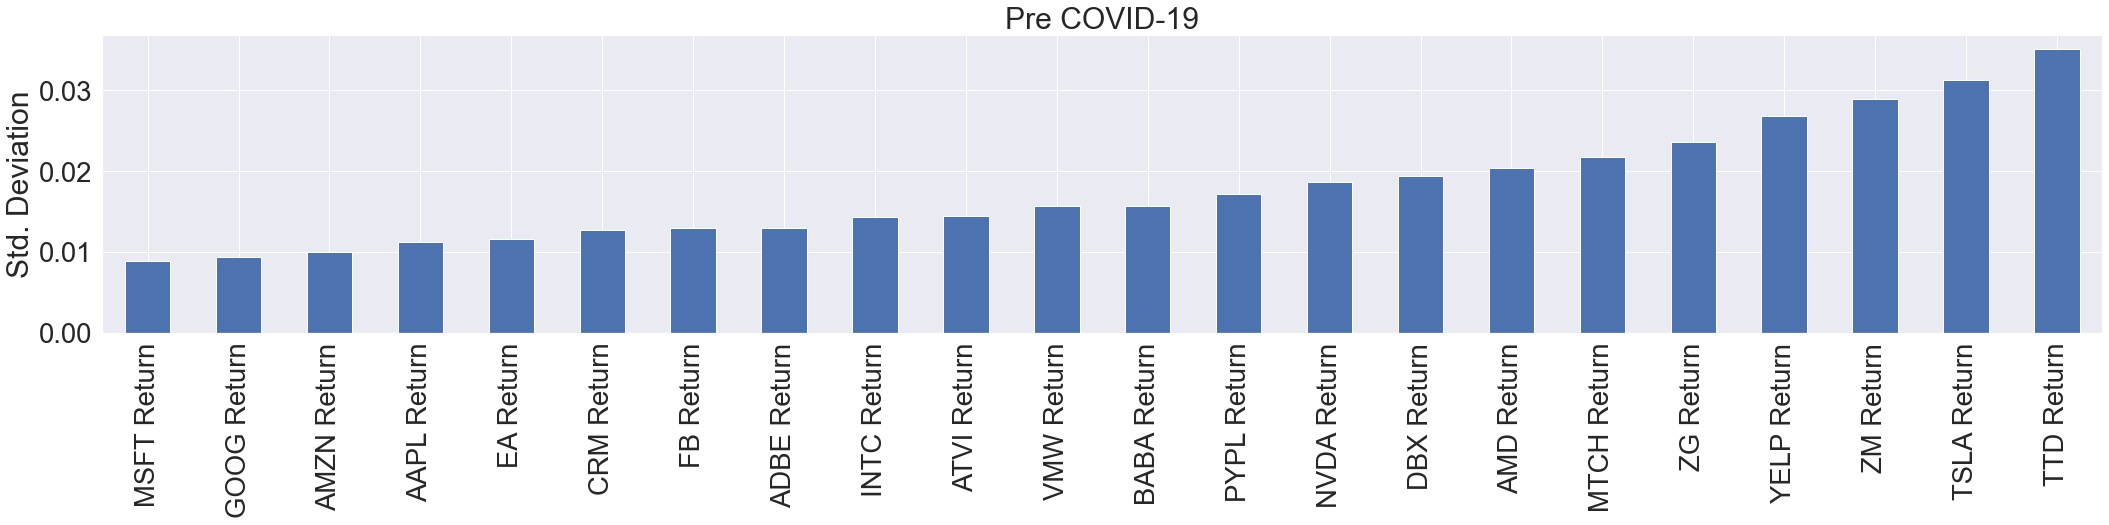

In [22]:
pre_corona=returns.loc['2019-10-01':'2019-12-31'].std()
sns.set(font_scale=2.5)
plt.figure(figsize=(30,8))
pre_corona.sort_values().plot.bar(title="Pre COVID-19")
plt.ylabel("Std. Deviation")
plt.tight_layout()

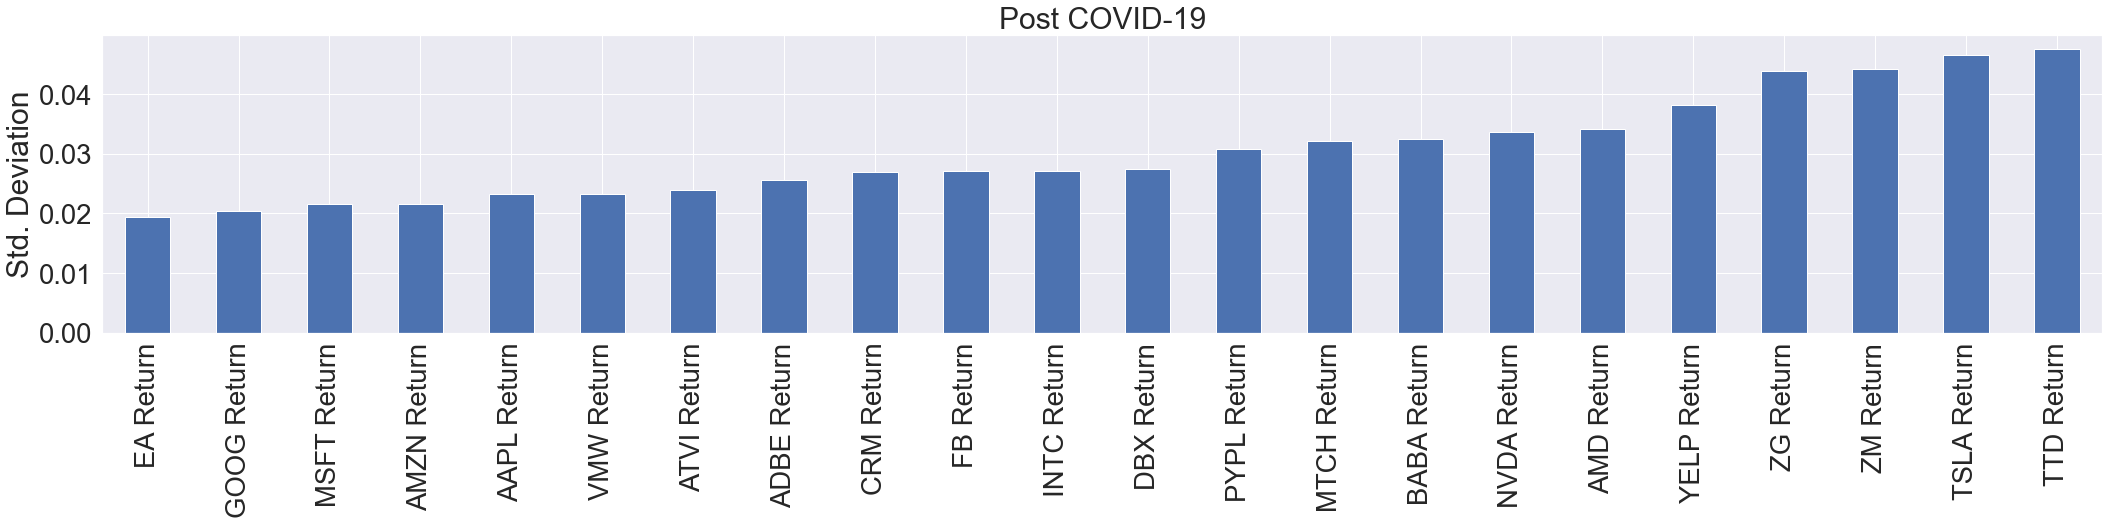

In [23]:
post_corona=returns.loc['2020-01-01':current_date_str].std()
sns.set(font_scale=2.5)
plt.figure(figsize=(30,8))
post_corona.sort_values().plot.bar(title="Post COVID-19")
plt.ylabel("Std. Deviation")
plt.tight_layout()

It is clear that MSFT has suffered the most - shifting from the most **reliable** stock to a relatively **volatile** stock due to this pandemic!

From the above collection, let's choose 5 stocks that have suffered significant effects. I am picking the following - MSFT, BABA, AAPL, MTCH and ZM. Interesting is the irregularity of ZM stocks (that provides a video conferencing service) which shot up to being a necessary tool for all kinds of Work from Home requirements. 

In [29]:
selected_tickers = ['MSFT', 'BABA', 'AAPL', 'MTCH','ZM', 'DBX']
selected_tech_stocks = pd.concat([df_map['MSFT'],df_map['BABA'],df_map['AAPL'],df_map['MTCH'],df_map['ZM'],df_map['DBX']],axis=1,keys=selected_tickers)
selected_tech_stocks.columns.names = ['Stock Ticker','Stock Info']
selected_tech_stocks.xs(key='Close',axis=1,level='Stock Info').loc['2019-10-01':current_date_str].iplot(width=3.5)
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#plt.tight_layout()

Finally: Using a heatmap of the correlation between the selected stocks Close Price

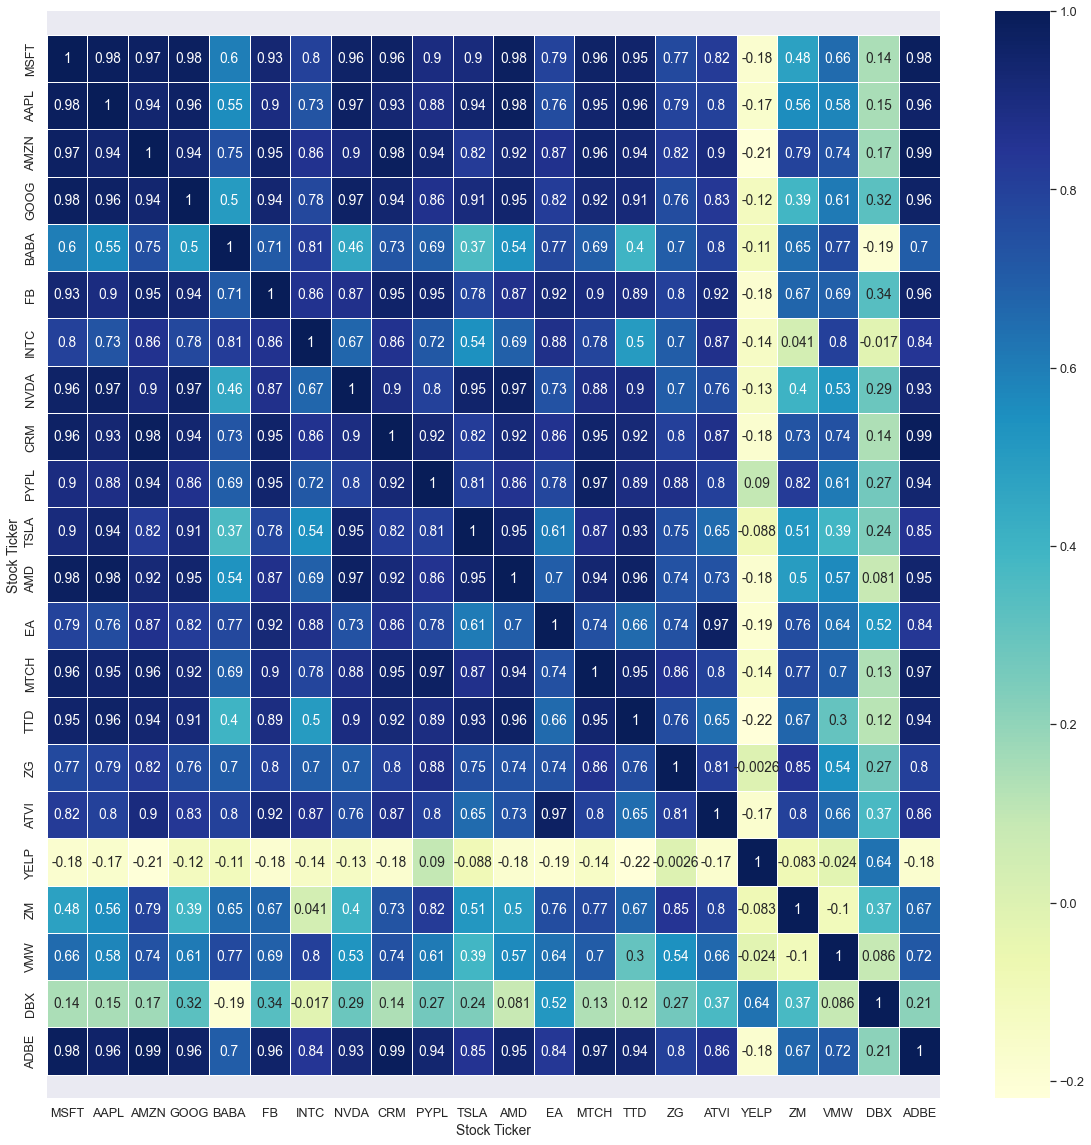

<Figure size 432x288 with 0 Axes>

In [27]:
plt.figure(figsize=(20,20))
sns.set(font_scale=1.15)
sns.heatmap(tech_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),linewidths=.5,cmap='YlGnBu',annot=True)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()
plt.tight_layout()